In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_empresas = pd.read_csv("../data/1 - empresas_ativas_interpoladas.csv")
df_populacao = pd.read_csv("../data/1 - populacao_igbe.csv")

# Renomear coluna para consistência
df_populacao.rename(columns={'POPULACAO': 'Populacao'}, inplace=True)
df_empresas.rename(columns={'Região': 'Regiao'}, inplace=True)
df_empresas.rename(columns={'Ano': 'ANO'}, inplace=True)

In [3]:
df_merged = pd.merge(
    df_empresas,
    df_populacao,
    how='inner',
    on=['Regiao', 'ANO']
)

df_merged['Razao_Populacao_Empresa'] = df_merged['Populacao'] / df_merged['Empresas_Ativas']

df_merged.to_csv("../data/2 - relacao_populacao_empresas.csv", index=False)

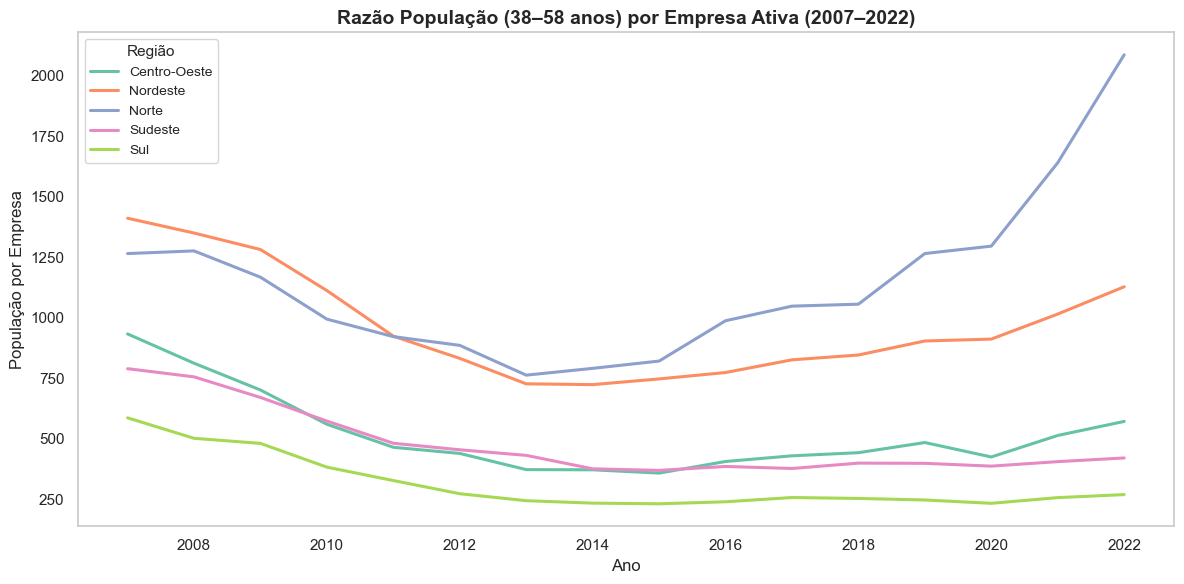

In [4]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

cores = sns.color_palette("Set2", n_colors=len(df_merged['Regiao'].unique())) # Paleta harmônica

for i, regiao in enumerate(df_merged['Regiao'].unique()):
    dados_regiao = df_merged[df_merged['Regiao'] == regiao]
    plt.plot(
        dados_regiao['ANO'],
        dados_regiao['Razao_Populacao_Empresa'],
        label=regiao,
        color=cores[i],
        linewidth=2.2
    )

plt.title("Razão População (38–58 anos) por Empresa Ativa (2007–2022)", fontsize=14, weight='bold')
plt.xlabel("Ano", fontsize=12)
plt.ylabel("População por Empresa", fontsize=12)

plt.grid(False) # Remover grid horizontal

plt.gca().set_facecolor('white')
plt.gcf().patch.set_facecolor('white')

plt.legend(title='Região', fontsize=10, title_fontsize=11) # Legenda
plt.tight_layout()
plt.show()